In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

import warnings
warnings.filterwarnings('ignore')


In [47]:
rand_state=1000

In [85]:
read_file = pd.read_csv(r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli3Polygon1.txt') 

In [86]:
read_file.to_csv (r'C:\Users\atsed\Desktop\Thesis_Reg\AOI_hitStimuli3Polygon1.csv', index=None)

In [87]:
df = pd.read_table('AOI_hitStimuli3Polygon1.csv')

In [88]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon1
0,Skilled,625,306,666,626,326,1
1,Skilled,621,304,666,626,326,1
2,Skilled,620,303,666,626,326,1
3,Skilled,621,304,666,626,326,1
4,Skilled,622,300,666,626,326,1


In [89]:
df.nunique()

Skill_level                    2
Gaze_point_X                 754
Gaze_point_Y                 845
Gaze_event_duration          106
Fixation_point_X             444
Fixation_point_Y             532
AOI_hit_Stimuli3_Polygon1      2
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24541 entries, 0 to 24540
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill_level                24541 non-null  object
 1   Gaze_point_X               24541 non-null  int64 
 2   Gaze_point_Y               24541 non-null  int64 
 3   Gaze_event_duration        24541 non-null  int64 
 4   Fixation_point_X           24541 non-null  int64 
 5   Fixation_point_Y           24541 non-null  int64 
 6   AOI_hit_Stimuli3_Polygon1  24541 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [91]:
df.isna().sum()

Skill_level                  0
Gaze_point_X                 0
Gaze_point_Y                 0
Gaze_event_duration          0
Fixation_point_X             0
Fixation_point_Y             0
AOI_hit_Stimuli3_Polygon1    0
dtype: int64

In [92]:
df.describe()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon1
count,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000,24541.000000
mean,685.371786,348.716271,630.703802,685.202559,349.088709,0.425125
std,128.361134,186.632301,885.857751,127.906720,185.977232,0.494372
min,104.000000,-66.000000,66.000000,114.000000,-34.000000,0.000000
25%,621.000000,192.000000,233.000000,621.000000,191.000000,0.000000
50%,688.000000,299.000000,366.000000,686.000000,299.000000,0.000000
75%,776.000000,541.000000,616.000000,778.000000,544.000000,1.000000
max,1636.000000,970.000000,5907.000000,1629.000000,960.000000,1.000000


<Figure size 600x400 with 0 Axes>

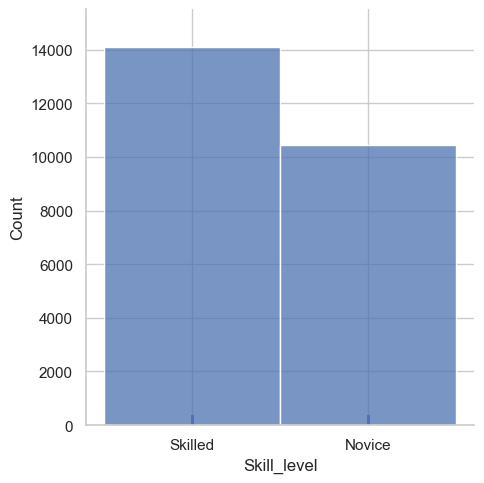

In [93]:
plt.figure(figsize=(6,4))
sns.displot(df['Skill_level'], rug=True)
plt.show()

In [94]:
ordinal_categoricals = ['Skill_level']

In [95]:
from sklearn.preprocessing import OrdinalEncoder

In [96]:
enc = OrdinalEncoder()

In [97]:
df[ordinal_categoricals] = enc.fit_transform(df[ordinal_categoricals])

In [98]:
df.head()

,Skill_level,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli3_Polygon1
0,1.0,625,306,666,626,326,1
1,1.0,621,304,666,626,326,1
2,1.0,620,303,666,626,326,1
3,1.0,621,304,666,626,326,1
4,1.0,622,300,666,626,326,1


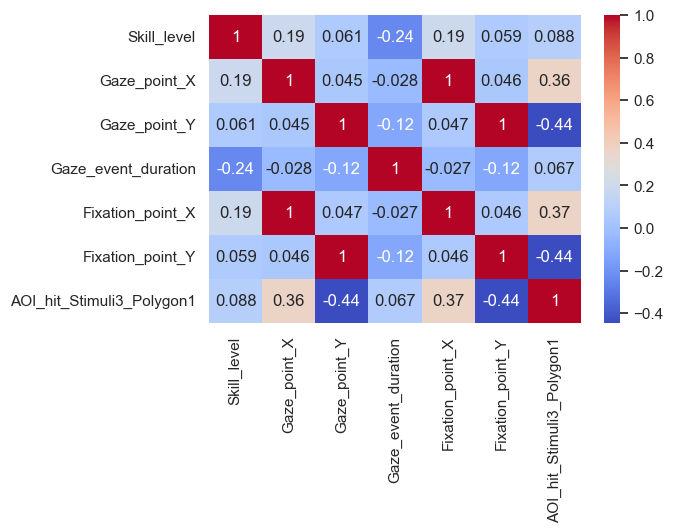

In [99]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

CPU times: total: 13.4 s
Wall time: 15.8 s


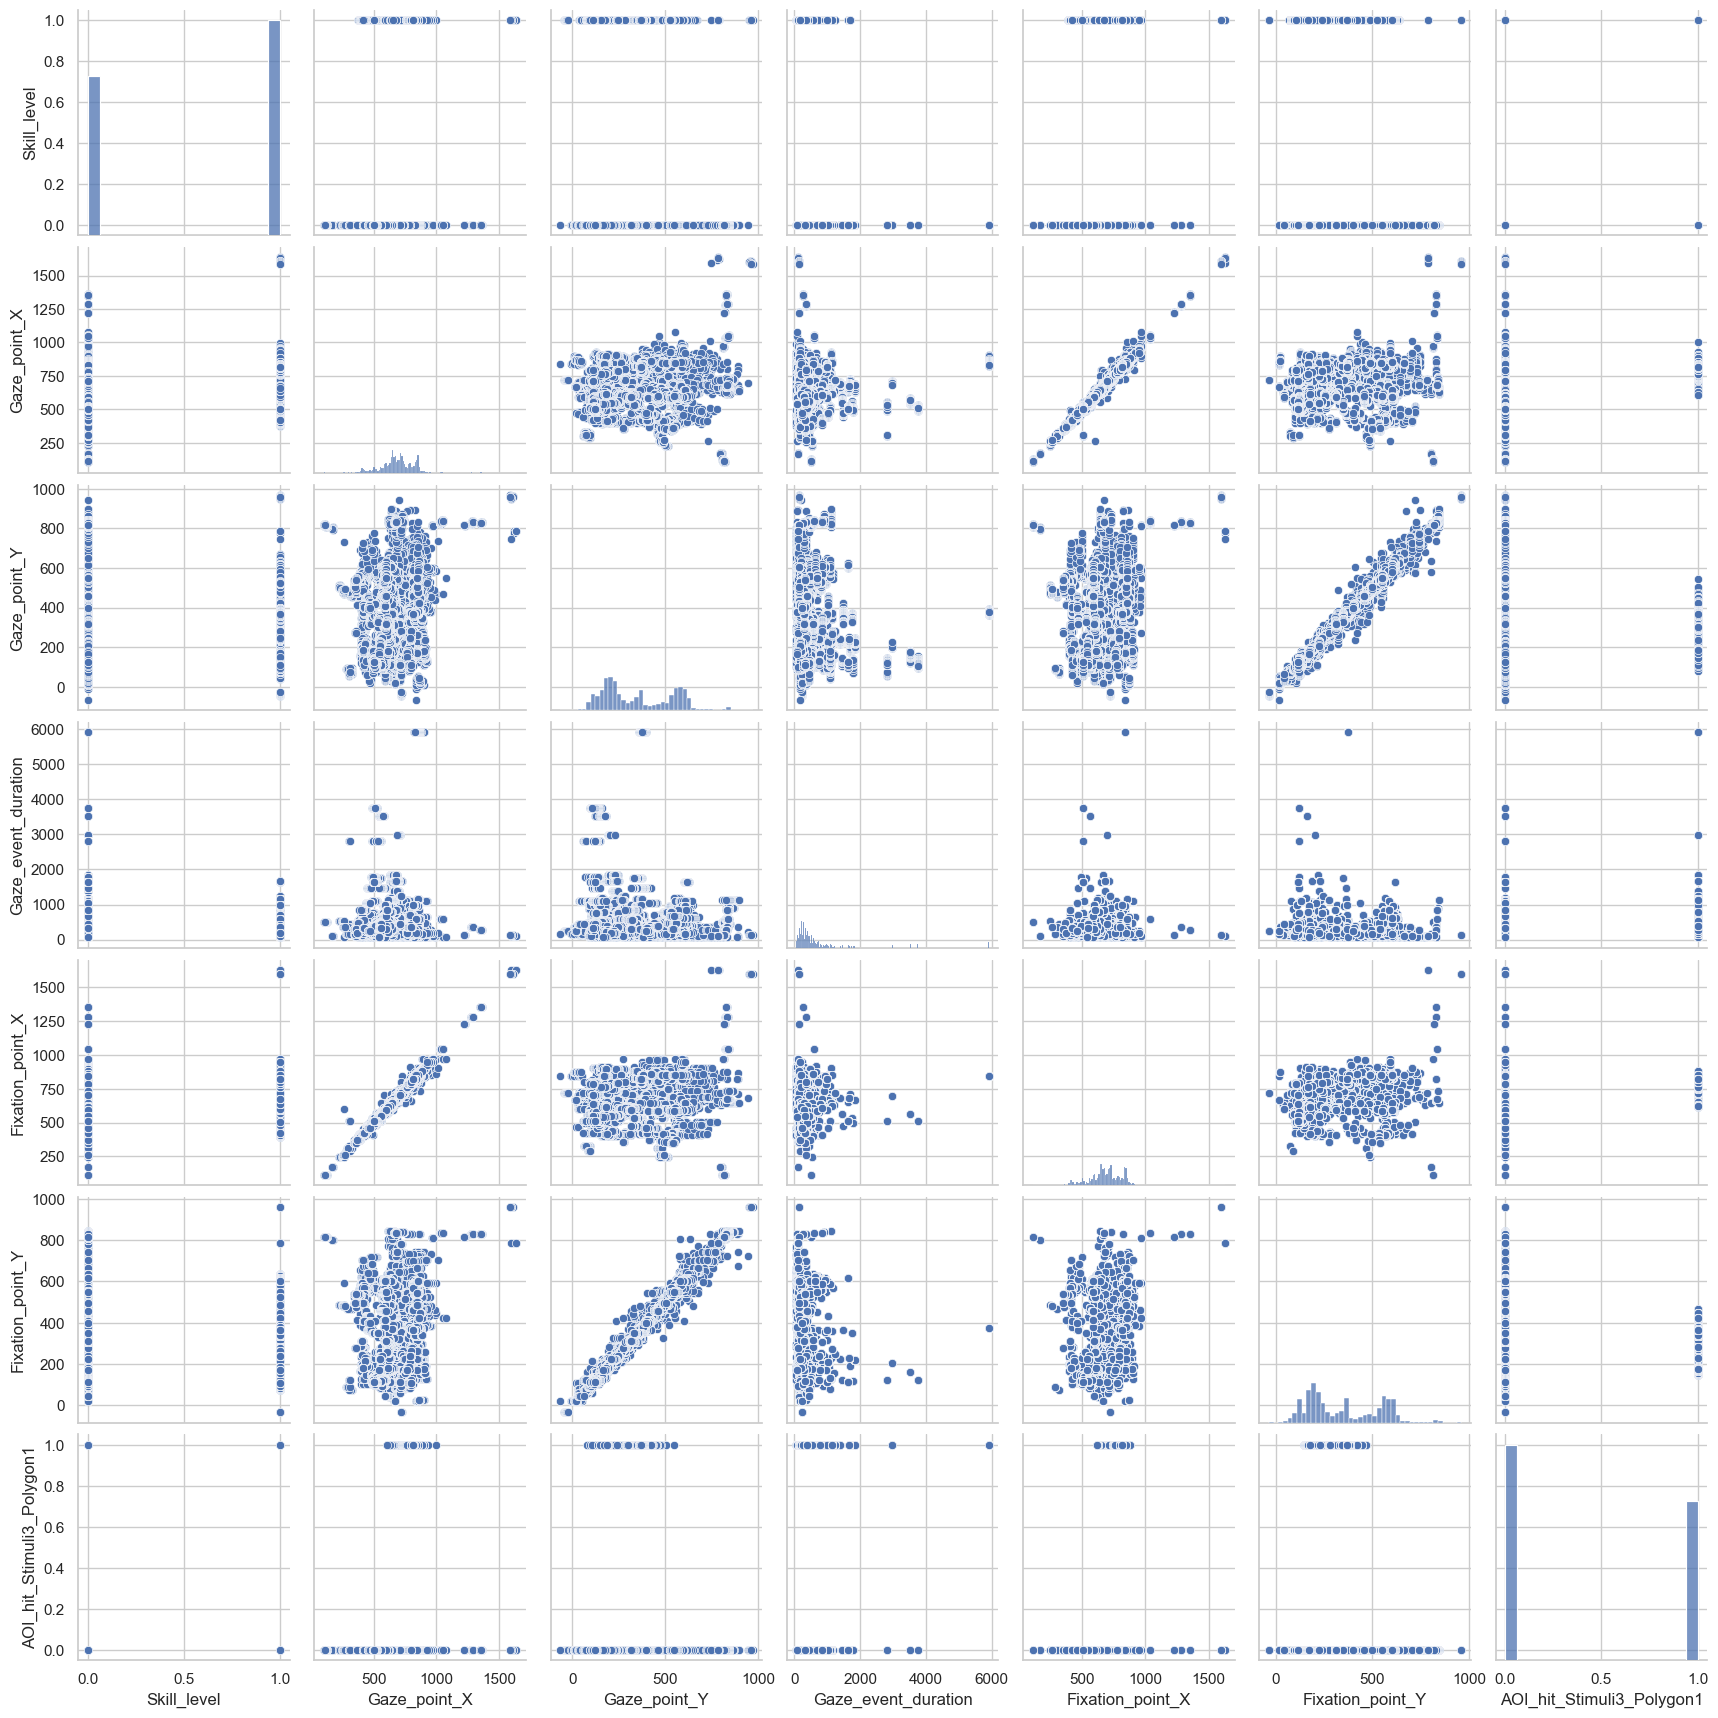

In [101]:
%%time

sns.pairplot(df[['Skill_level', 'Gaze_point_X', 'Gaze_point_Y', 'Gaze_event_duration', 'Fixation_point_X', 'Fixation_point_Y', 'AOI_hit_Stimuli3_Polygon1' ]])

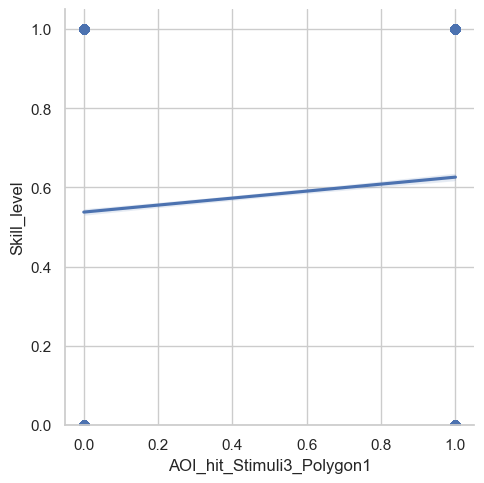

In [105]:
g= sns.lmplot(x='AOI_hit_Stimuli3_Polygon1', y='Skill_level', data=df)
g.set(ylim=(0, None))
plt.show()

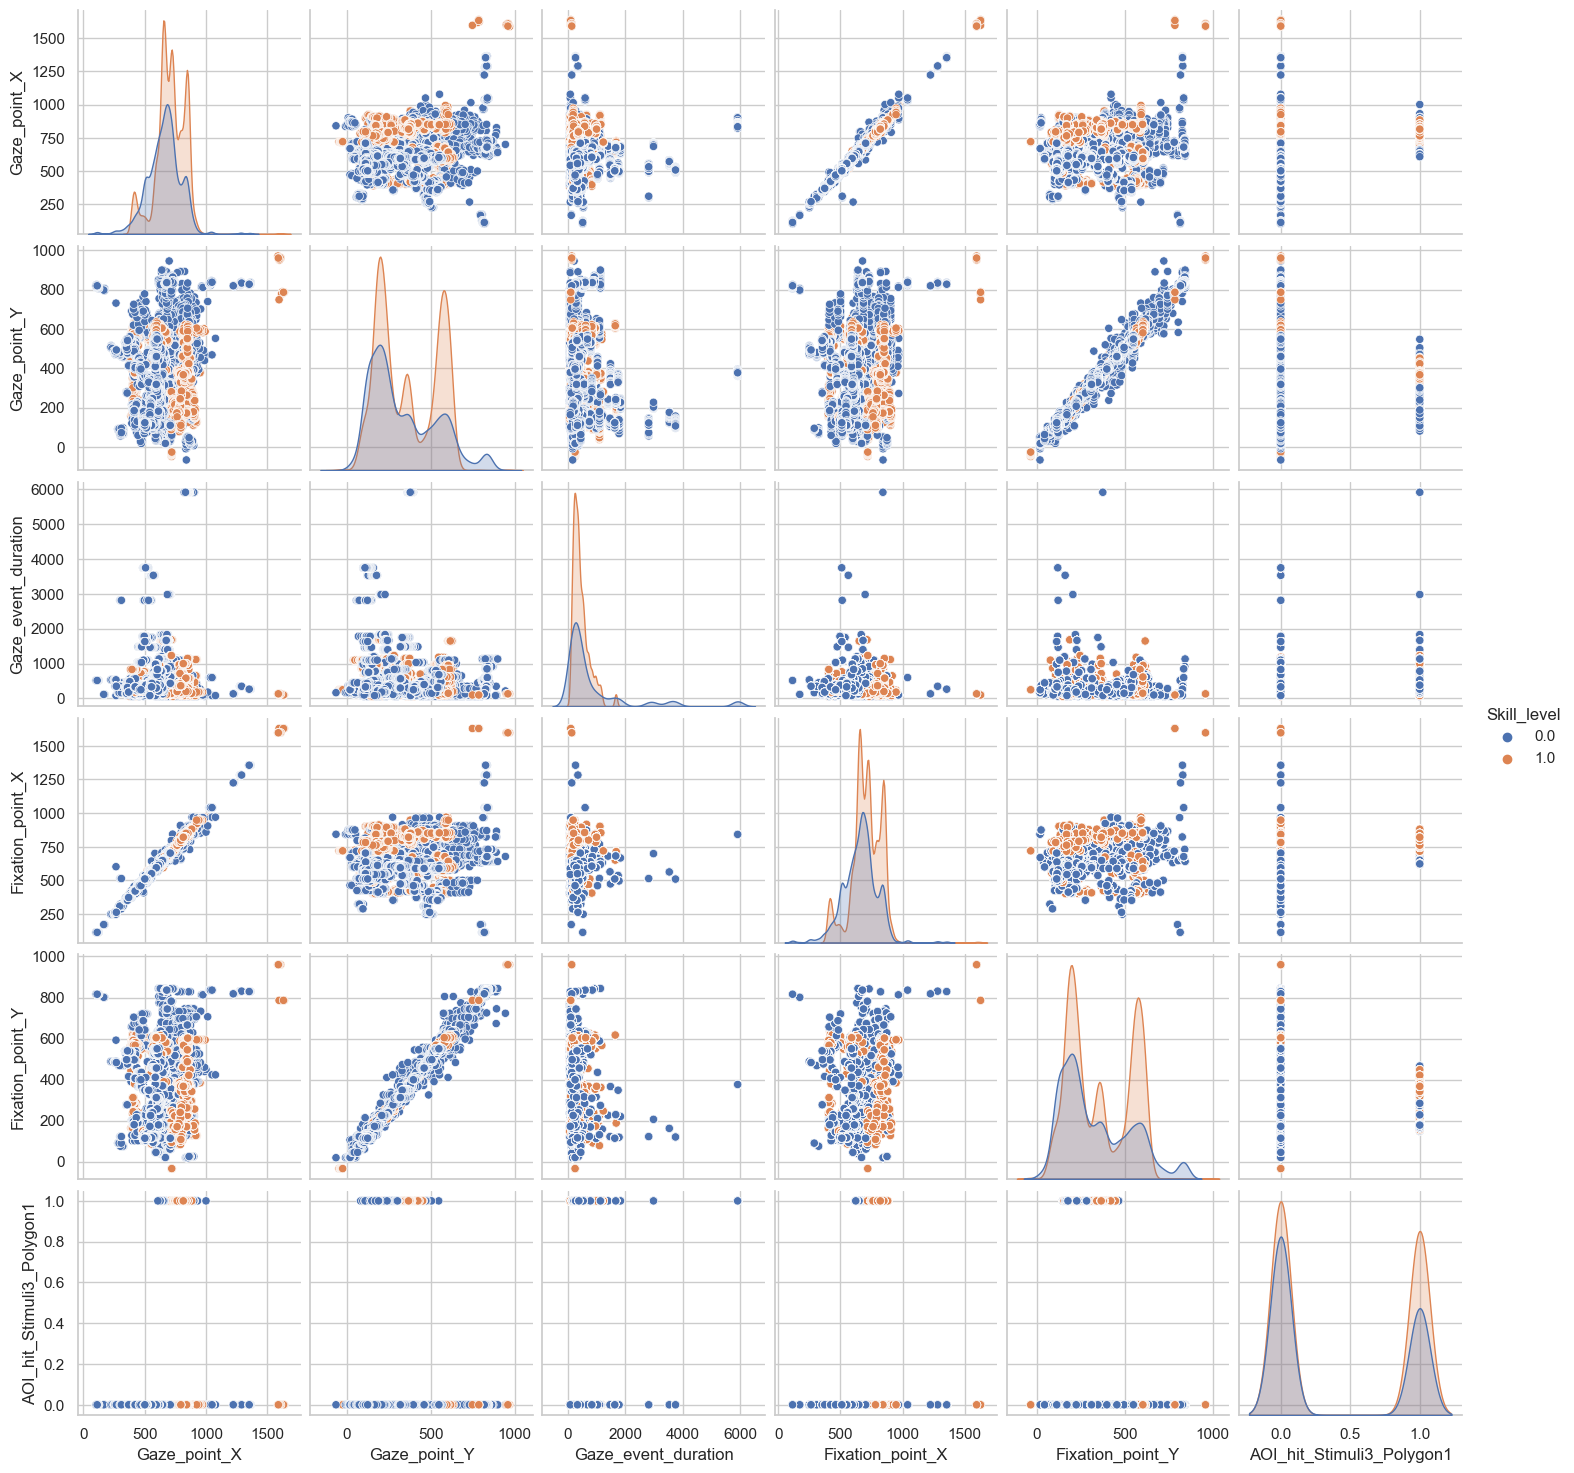

In [103]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='Skill_level')

In [104]:
y = df['Skill_level']
X = df.drop('Skill_level', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

np.round(len(X_train)/len(X),3)

0.8

In [76]:
reg_model = LinearRegression()


In [77]:
X_train.head()

,Gaze_point_X,Gaze_point_Y,Gaze_event_duration,Fixation_point_X,Fixation_point_Y,AOI_hit_Stimuli4_Polygon1
12810,785,161,882,794,162,0
14582,468,143,2679,476,138,0
15481,650,456,466,651,460,0
8769,827,533,300,830,517,1
7985,903,380,965,902,370,0


In [106]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [107]:
y_hat = reg_model.predict(X_test)

In [108]:
df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat, 'resid': y_test - y_hat})
df_predictions.head()

,actuals,predictions,resid
21934,0.0,0.435003,-0.435003
3862,1.0,0.752894,0.247106
8938,0.0,0.683069,-0.683069
21021,1.0,0.745374,0.254626
8083,1.0,0.651472,0.348528


In [109]:
reg_model.coef_

array([-0.00115852,  0.00094281, -0.00013102,  0.00175443, -0.00078684,
        0.06979908])

In [110]:
reg_model.intercept_

0.1661048476581255

In [111]:
reg_summary = pd.DataFrame(data= X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(reg_model.coef_,4)
reg_summary

,Features,Coefficients
0,Gaze_point_X,-0.0012
1,Gaze_point_Y,0.0009
2,Gaze_event_duration,-0.0001
3,Fixation_point_X,0.0018
4,Fixation_point_Y,-0.0008
5,AOI_hit_Stimuli3_Polygon1,0.0698


In [112]:
print('Training data R-squared:', np.round(reg_model.score(X_train, y_train),3))
print('Test data R-squared:', np.round(reg_model.score(X_train, y_train),3))

Training data R-squared: 0.096
Test data R-squared: 0.096


In [113]:
X_train.shape

(19632, 6)

In [114]:
def adj_R2(X,y):
    R2 = reg_model.score(X,y)
    n = X.shape[0]
    k = X.shape[1]
    return np.round(1-(1-R2)*(n-1)/(n-k-1),3)

In [115]:
adj_R2(X_train, y_train)

0.096

In [116]:
df_predictions.head()

,actuals,predictions,resid
21934,0.0,0.435003,-0.435003
3862,1.0,0.752894,0.247106
8938,0.0,0.683069,-0.683069
21021,1.0,0.745374,0.254626
8083,1.0,0.651472,0.348528


In [117]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.22

In [118]:
MSE_test = np.mean(np.square(df_predictions['resid']))
np.round(MSE_test,3)

0.22

In [119]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.469

In [120]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [121]:
my_estimator = LinearRegression()

In [122]:
R2 = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="r2")

In [123]:
R2

array([0.09311931, 0.10407305, 0.10275959, 0.08034961, 0.09688012])

In [124]:
NMSE = cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [125]:
MSE = -NMSE
MSE

array([0.22108704, 0.21914623, 0.21951529, 0.22516777, 0.22018546])

In [126]:
MSE_CV = np.mean(MSE)
np.round(MSE_CV,3)

0.221

In [127]:
RMSE = np.sqrt(MSE)
RMSE

array([0.47019894, 0.46813057, 0.46852458, 0.47451846, 0.46923924])